In [1]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA dataset/TCGA_Mesothelioma_(MESO)/TCGA.MESO.sampleMap_MESO_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA dataset/TCGA_Mesothelioma_(MESO)/TCGA.MESO.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,asbestos_exposure_age,asbestos_exposure_age_last,...,_GENOMIC_ID_TCGA_MESO_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_MESO_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_MESO_RPPA,_GENOMIC_ID_TCGA_MESO_gistic2,_GENOMIC_ID_TCGA_MESO_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_MESO_miRNA_HiSeq,_GENOMIC_ID_TCGA_MESO_exp_HiSeqV2,_GENOMIC_ID_TCGA_MESO_PDMRNAseqCNV,_GENOMIC_ID_TCGA_MESO_gistic2thd,_GENOMIC_ID_TCGA_MESO_hMethyl450
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,TCGA-3H-AB3K-01,TCGA-3H-AB3K,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,64,NaN,NaN,...,TCGA-3H-AB3K-01A-11D-A39R-32,919d8bde-c3b7-4cd9-8463-938afdb89ad7,FA2214BC-2F60-4767-BB8F-09679A9C0BD5,TCGA-3H-AB3K-01A-11D-A39Q-01,919d8bde-c3b7-4cd9-8463-938afdb89ad7,TCGA-3H-AB3K-01,919d8bde-c3b7-4cd9-8463-938afdb89ad7,TCGA-3H-AB3K-01,TCGA-3H-AB3K-01A-11D-A39Q-01,TCGA-3H-AB3K-01A-11D-A39S-05
TCGA-3H-AB3L-01,TCGA-3H-AB3L-01,TCGA-3H-AB3L,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,60,NaN,NaN,...,TCGA-3H-AB3L-01A-11D-A39R-32,3baf5546-99d9-417b-97bb-e00dda7ebcdd,81F9016D-1F8D-4902-AA68-2002130CF41F,TCGA-3H-AB3L-01A-11D-A39Q-01,3baf5546-99d9-417b-97bb-e00dda7ebcdd,TCGA-3H-AB3L-01,3baf5546-99d9-417b-97bb-e00dda7ebcdd,TCGA-3H-AB3L-01,TCGA-3H-AB3L-01A-11D-A39Q-01,TCGA-3H-AB3L-01A-11D-A39S-05
TCGA-3H-AB3M-01,TCGA-3H-AB3M-01,TCGA-3H-AB3M,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,53,NaN,NaN,...,TCGA-3H-AB3M-01A-11D-A39R-32,f0b52bcf-d7b4-4daa-82bb-e13e2d753be9,F98B8A5F-23ED-477D-833E-71730A4BE6B9,TCGA-3H-AB3M-01A-11D-A39Q-01,f0b52bcf-d7b4-4daa-82bb-e13e2d753be9,TCGA-3H-AB3M-01,f0b52bcf-d7b4-4daa-82bb-e13e2d753be9,TCGA-3H-AB3M-01,TCGA-3H-AB3M-01A-11D-A39Q-01,TCGA-3H-AB3M-01A-11D-A39S-05
TCGA-3H-AB3O-01,TCGA-3H-AB3O-01,TCGA-3H-AB3O,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,58,25.0,31.0,...,TCGA-3H-AB3O-01A-11D-A39R-32,de645724-4408-4771-9814-cdeffec79758,3B2C605A-9789-400E-B1B5-A8CEDA10E484,TCGA-3H-AB3O-01A-11D-A39Q-01,de645724-4408-4771-9814-cdeffec79758,TCGA-3H-AB3O-01,de645724-4408-4771-9814-cdeffec79758,TCGA-3H-AB3O-01,TCGA-3H-AB3O-01A-11D-A39Q-01,TCGA-3H-AB3O-01A-11D-A39S-05
TCGA-3H-AB3S-01,TCGA-3H-AB3S-01,TCGA-3H-AB3S,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,69,NaN,NaN,...,TCGA-3H-AB3S-01A-21D-A39R-32,34787f03-da7e-4f3e-b33f-73b1bf51fb74,BF706147-4C7D-4C10-B27A-C4851B1B4DFA,TCGA-3H-AB3S-01A-21D-A39Q-01,34787f03-da7e-4f3e-b33f-73b1bf51fb74,TCGA-3H-AB3S-01,34787f03-da7e-4f3e-b33f-73b1bf51fb74,TCGA-3H-AB3S-01,TCGA-3H-AB3S-01A-21D-A39Q-01,TCGA-3H-AB3S-01A-21D-A39S-05


In [5]:
gene_data.head()

,TCGA-SH-A7BC-01,TCGA-LK-A4NY-01,TCGA-3H-AB3L-01,TCGA-3U-A98F-01,TCGA-NQ-A638-01,TCGA-MQ-A6BS-01,TCGA-ZN-A9VV-01,TCGA-3H-AB3X-01,TCGA-3U-A98G-01,TCGA-TS-A7PB-01,...,TCGA-YS-A95C-01,TCGA-MQ-A4LM-01,TCGA-3H-AB3T-01,TCGA-UT-A88D-01,TCGA-MQ-A4KX-01,TCGA-3U-A98I-01,TCGA-TS-A7OU-01,TCGA-LK-A4O6-01,TCGA-TS-A7P7-01,TCGA-ZN-A9VW-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.566692,-1.148192,0.200408,-2.360992,-0.098292,-0.386092,-1.352492,0.503108,-0.662192,-1.328692,...,-0.833992,-1.056392,-0.505092,-0.207492,0.072908,-0.578292,0.354308,-0.479092,-1.472692,-0.856492
HIF3A,-3.993126,-0.560126,-4.117426,2.860974,-1.254426,-1.119526,1.532374,-1.579526,-0.520126,-1.517626,...,-3.770726,-2.890926,-5.554726,-0.867826,-2.518126,-1.904426,-3.805626,0.799274,3.710074,-0.225026
RNF17,-0.124735,-0.531035,-0.531035,-0.055435,-0.047735,0.034365,-0.531035,-0.531035,-0.531035,-0.531035,...,0.620765,-0.531035,-0.531035,1.192765,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.743328,0.631928,0.786128,0.011228,0.930628,0.492728,0.161328,0.271728,-0.002872,0.686128,...,1.299528,-0.037572,0.036928,-0.110272,1.019828,0.159728,1.244628,0.156228,0.730128,0.141428
RNF11,0.085322,-0.046578,-0.033878,-0.855678,-0.103878,0.332522,0.252122,-0.106878,0.498622,0.189322,...,-0.638678,-0.081278,-0.100678,0.005822,-0.070778,0.338022,0.530122,-0.568078,0.219122,0.302922


In [6]:
gene_fullname = 'BAP1 gene'
gene = 'bap1'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Mesothelioma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 96 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-SH-A7BC-01,-0.566692,-3.993126,-0.124735,0.743328,0.085322,0.30559,-0.080794,0.308554,0.779001,-0.903372,...,-0.342578,-1.180817,1.348767,-1.28139,0.134123,3.063714,-0.633227,0.519305,1.216667,0.085688
TCGA-LK-A4NY-01,-1.148192,-0.560126,-0.531035,0.631928,-0.046578,0.23699,-0.053894,0.635654,-0.423399,-0.076872,...,-0.149878,1.256083,0.057067,1.45441,0.154123,2.470714,-1.092527,0.420705,2.621967,0.272188
TCGA-3H-AB3L-01,0.200408,-4.117426,-0.531035,0.786128,-0.033878,0.10959,-0.456594,-0.717246,-0.423399,-0.440172,...,-0.748878,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988
TCGA-3U-A98F-01,-2.360992,2.860974,-0.055435,0.011228,-0.855678,-0.54231,0.055506,1.018154,-0.423399,0.800028,...,0.083722,-0.025217,0.349767,2.34201,1.073923,2.052214,-0.200927,-0.438495,0.941467,-1.184112
TCGA-NQ-A638-01,-0.098292,-1.254426,-0.047735,0.930628,-0.103878,0.58769,-0.530994,-0.052446,0.059901,0.890928,...,-0.748878,-1.587117,1.167667,2.17121,-0.391177,3.177414,-1.125027,0.260005,0.033967,0.443288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-3U-A98I-01,-0.578292,-1.904426,-0.531035,0.159728,0.338022,-0.48511,-0.330194,1.377954,-0.423399,1.139328,...,-0.748878,-1.587117,0.717367,-1.28139,0.493123,2.570714,1.599373,-0.354695,2.327567,0.206688
TCGA-TS-A7OU-01,0.354308,-3.805626,-0.531035,1.244628,0.530122,0.45969,-0.089494,-0.180246,0.246001,-3.123772,...,-0.748878,1.318683,2.146167,-0.61199,-0.536977,1.850314,-0.951527,0.629005,-0.204833,0.730288
TCGA-LK-A4O6-01,-0.479092,0.799274,-0.531035,0.156228,-0.568078,-0.56301,0.013106,2.456154,-0.423399,1.166128,...,0.086522,-1.587117,0.855267,-1.28139,0.235023,2.880314,0.721473,0.526505,2.945267,0.044288
TCGA-TS-A7P7-01,-1.472692,3.710074,-0.531035,0.730128,0.219122,-0.37731,-0.668394,2.277554,0.192201,3.104428,...,-0.133278,-0.210517,-1.224433,-1.28139,0.834123,2.526814,1.862473,-0.112595,1.602767,-0.410312


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,asbestos_exposure_age,asbestos_exposure_age_last,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,TCGA-3H-AB3K-01,TCGA-3H-AB3K,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,64,NaN,NaN,...,-0.061978,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588
TCGA-3H-AB3L-01,TCGA-3H-AB3L-01,TCGA-3H-AB3L,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,60,NaN,NaN,...,-0.748878,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988
TCGA-3H-AB3M-01,TCGA-3H-AB3M-01,TCGA-3H-AB3M,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,53,NaN,NaN,...,0.062822,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488
TCGA-3H-AB3O-01,TCGA-3H-AB3O-01,TCGA-3H-AB3O,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,58,25.0,31.0,...,1.031722,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088
TCGA-3H-AB3S-01,TCGA-3H-AB3S-01,TCGA-3H-AB3S,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,69,NaN,NaN,...,-0.748878,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488


In [8]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,-23591,0.160908,-3.157426,-0.531035,0.483128,-0.152778,0.65969,0.001606,0.095754,-0.423399,...,-0.061978,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588
TCGA-3H-AB3L-01,-21972,0.200408,-4.117426,-0.531035,0.786128,-0.033878,0.10959,-0.456594,-0.717246,-0.423399,...,-0.748878,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988
TCGA-3H-AB3M-01,-19503,-1.009592,-2.663326,-0.068835,0.828928,-0.737678,0.77649,-0.002594,-0.552846,0.388301,...,0.062822,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488
TCGA-3H-AB3O-01,-21423,-0.147492,-2.266526,-0.531035,0.274528,-0.311878,0.31179,-1.012494,2.159654,0.149201,...,1.031722,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088
TCGA-3H-AB3S-01,-25471,0.282008,-2.042126,-0.531035,0.825228,-0.210878,0.07039,-0.070994,0.310754,-0.423399,...,-0.748878,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488


In [9]:

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Mesothelioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,-23591,0.160908,-3.157426,-0.531035,0.483128,-0.152778,0.65969,0.001606,0.095754,-0.423399,...,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588,1
TCGA-3H-AB3L-01,-21972,0.200408,-4.117426,-0.531035,0.786128,-0.033878,0.10959,-0.456594,-0.717246,-0.423399,...,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988,1
TCGA-3H-AB3M-01,-19503,-1.009592,-2.663326,-0.068835,0.828928,-0.737678,0.77649,-0.002594,-0.552846,0.388301,...,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488,1
TCGA-3H-AB3O-01,-21423,-0.147492,-2.266526,-0.531035,0.274528,-0.311878,0.31179,-1.012494,2.159654,0.149201,...,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088,1
TCGA-3H-AB3S-01,-25471,0.282008,-2.042126,-0.531035,0.825228,-0.210878,0.07039,-0.070994,0.310754,-0.423399,...,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488,1


In [10]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

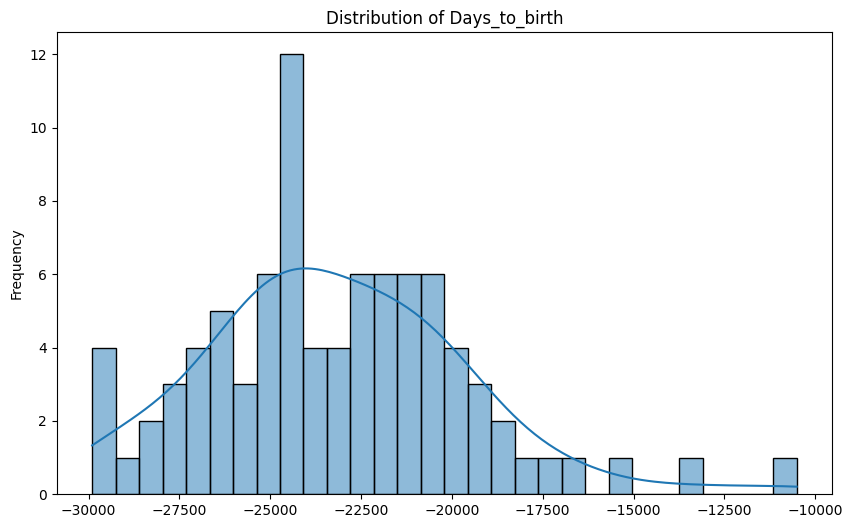

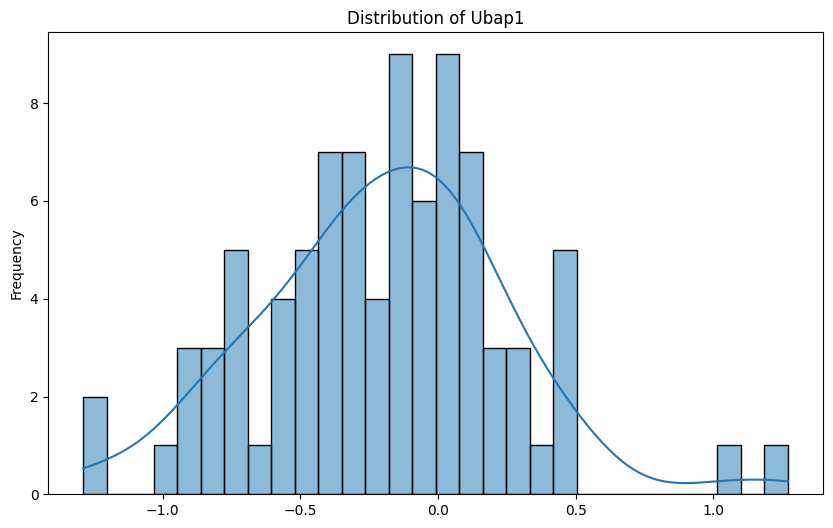

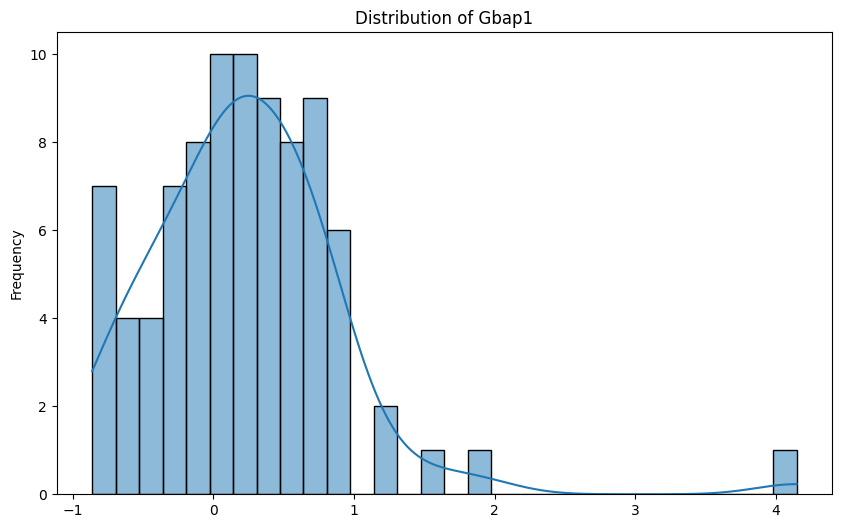

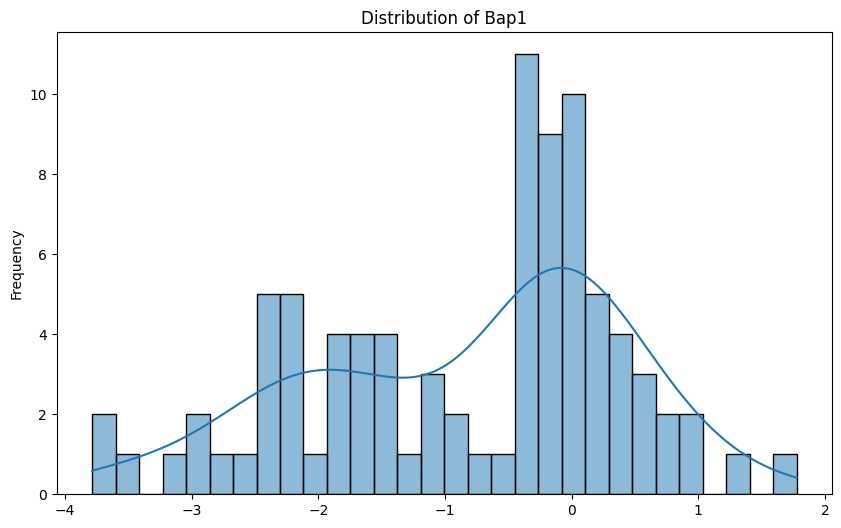

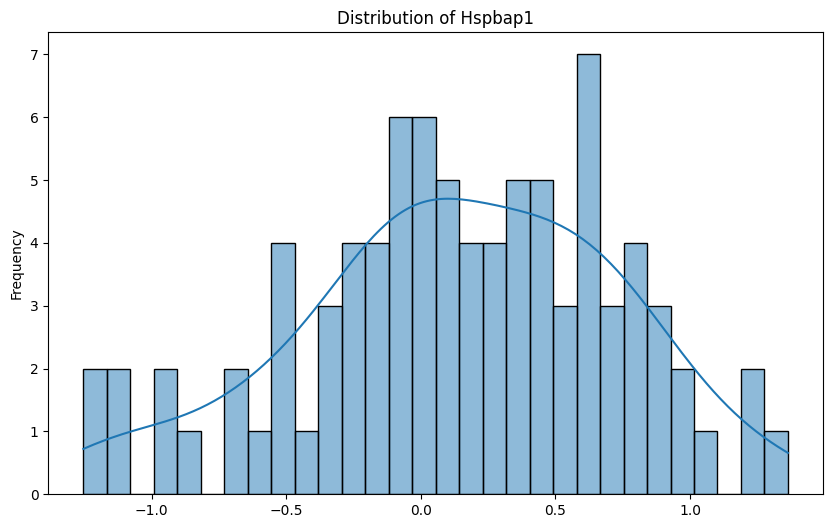

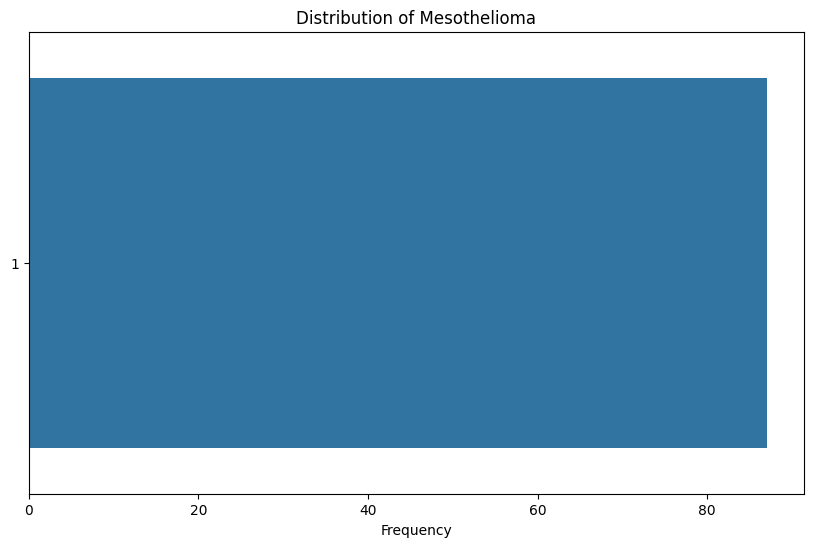

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

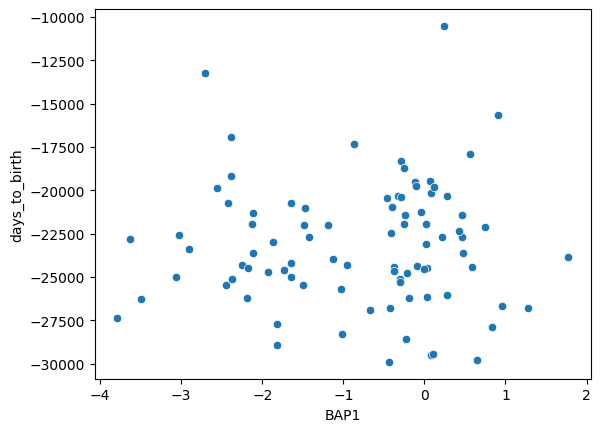

In [12]:
sns.scatterplot(data=merged_data, x='BAP1', y=condition_col)
plt.show()

In [13]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Mesothelioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,64,0.160908,-3.157426,-0.531035,0.483128,-0.152778,0.65969,0.001606,0.095754,-0.423399,...,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588,1
TCGA-3H-AB3L-01,60,0.200408,-4.117426,-0.531035,0.786128,-0.033878,0.10959,-0.456594,-0.717246,-0.423399,...,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988,1
TCGA-3H-AB3M-01,53,-1.009592,-2.663326,-0.068835,0.828928,-0.737678,0.77649,-0.002594,-0.552846,0.388301,...,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488,1
TCGA-3H-AB3O-01,58,-0.147492,-2.266526,-0.531035,0.274528,-0.311878,0.31179,-1.012494,2.159654,0.149201,...,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088,1
TCGA-3H-AB3S-01,69,0.282008,-2.042126,-0.531035,0.825228,-0.210878,0.07039,-0.070994,0.310754,-0.423399,...,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488,1


In [14]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

C:\Users\Bobibob\AppData\Local\Temp\ipykernel_11236\2284219672.py:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


1.0


In [15]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [20]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BAP1 gene and Mesothelioma when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BAP1 gene and Mesothelioma when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BAP1 gene and Mesothelioma when considering the influence of age.




In [18]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For bap1:
UBAP1: Coefficient = 2.1121942544984584e-32, p-value = 0.9999999999999984
GBAP1: Coefficient = -1.0140283864540737e-31, p-value = 0.999999999999994
BAP1: Coefficient = -1.6401070323225393e-31, p-value = 0.9999999999999887
HSPBAP1: Coefficient = -5.834973242756716e-31, p-value = 0.999999999999958

For age:
age: Coefficient = -1.0092531952030527e-31, p-value = 0.9999999999999905



In [19]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: UBAP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GBAP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BAP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: HSPBAP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).




In [21]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: UBAP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the UBAP1 gene and Mesothelioma when considering the influence of age.

Variable: GBAP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the GBAP1 gene and Mesothelioma when considering the influence of age.

Variable: BAP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BAP1 gene and Mesothelioma when considering the influence of age.

Variable: HSPBAP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the HSPBAP1 gene and Mesothelioma when considering the influence of age.


